In [3]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Root finding and gradient descent

Roots: Finding solution(s) to the equation $f(x)=0$.

Intermediate value theorem states that for an interval $[a,b]$ where $f(a)$ and $f(b)$ have opposite sign, $f$ must have at least one zero in the interval if $f$ is continous.

### Bisection method

Robust and garanteed to converge, however possibly with a slow rate. 

At each iteration the midpoint $m=frac{a+b}{2}$ of the interval is evaluated with two possible outcomes:
(We always have that opposite signs for $f(a)$ and $f(b)$)

- If $f(m)$ > 0: $a_{new} = m$, $b_{new}=b$
- If $f(m)$ < 0: $b_{new} = m$, $a_{new}=a$ 

The algorithm will thus always converge, until $f(m)=0$.

#### Code:

In [114]:
def bisection(x,y,max_it=100,conv=1e-20,prnt=True):
    nums = np.linspace(0,y.shape[0]-1,y.shape[0],dtype=int)
    a = nums[0]
    b = nums[-1]
    e2 = np.abs(y[a]-y[b])
    for i in range(max_it):
        m = int( (a + b) / 2)
        f = y[m]
        if np.abs(f) < conv:
            break
        if f > 0:
            b = m
        if f < 0:
            a = m
        e1 = e2
        e2 = np.abs(y[a]-y[b])
        if prnt:
            print('f(m) = {:10.4}: a={}, b={:>2}, error: {:.4}'.format(f,a,b,np.abs(y[a]-y[b])))
        if np.abs(e1-e2) < conv:
            break
    print('Converge for i = {}!'.format(i))
    return x[m],y[m]

#### Test

Converge for i = 7!
-0.84 -0.0039039999999994635


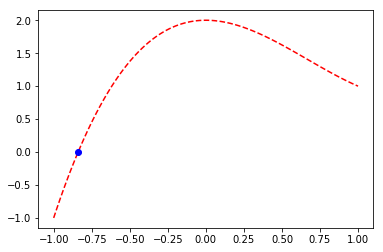

In [120]:
x = np.linspace(-1,1,101)
y = x**3 - 2*x**2 + 2
plt.plot(x,y,'r--')
x1,y1=bisection(x,y,prnt=False)
plt.plot(x1,y1,'bo')
print(x1,y1)

Update the algorithm with choosing a straigth line between the two end points instead of midpoint.

In [116]:
def secant(x,y,max_it=100,conv=1e-20,prnt=True):
    nums = np.linspace(0,y.shape[0]-1,y.shape[0],dtype=int)
    a = nums[0]
    b = nums[-1]
    e2 = np.abs(y[a]-y[b])
    for i in range(max_it):
        m = int( (0.5*y[b]*a - y[a]*b) / (0.5*y[b] - y[a]) + (x[0]+1) )
        f = y[m]
        if np.abs(f) < conv:
            break
        if f > 0:
            b = m
        if f < 0:
            a = m
        e1 = e2
        e2 = np.abs(y[a]-y[b])
        if prnt:
            print('f(m) = {:10.4}: a={}, b={:>2}, error: {:.4}'.format(f,a,b,np.abs(y[a]-y[b])))
        if np.abs(e1-e2) < conv:
            break
    print('Converge for i = {}!'.format(i))
    return x[m],y[m]

Converge for i = 6!
-0.84 -0.0039039999999999075


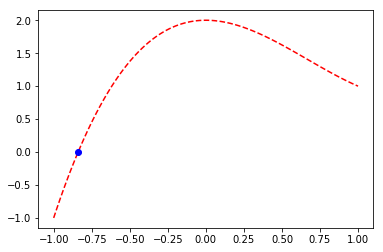

In [117]:
plt.plot(x,y,'r--')
x1,y1=secant(x,y,prnt=False)
plt.plot(x1,y1,'bo')
print(x1,y1)

### Newton's method

The iteration can be written:

$x_{n+1} = x_{n}-\frac{f(x_{n})}{f'(x_{n})}$

In [191]:
def newton(x0,x,y,dy, max_it=100,conv=1e-8):
    '''
    initial point x0 is relative to 0
    '''
    xn = x0
    for i in range(max_it):
        xn1 = xn - f(xn)/df(xn)
        error = np.abs(xn-xn1)
        if error < conv:
            print('Convergence for i = {}!'.format(i))
            break
        xn = xn1
    return xn

Convergence for i = 21!


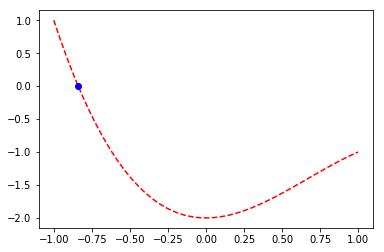

In [201]:
def f(x):
    return -x**3 + 2*x**2 - 2
def df(x):
    return -3*x**2 + 4*x

x0=newton(0.5,x,y,dy)
#print(x0)
plt.plot(x,y,'r--')
plt.plot(x0,f(x0),'bo')

### Broyden's method

### Steepest descent